In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/CodeHimalaya/nepali-news-dataset.csv', encoding='utf-8')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df

content  \
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेट...   
1      ट्याक्टर दुर्घटना हुँदा बैतडीमा दुई जनाको मृत्...   
2      भक्तपुरमा आज बिहान सवारी दुर्घटना हँदा एक जनाक...   
3      बैतडी बिहीवार ट्याक्टर दुर्घटना हुँदा चालकको घ...   
4      बैतडीको सुनर्या गाउँपालिका–७ आलुगैरामा जिप दुर...   
...                                                  ...   
61340  काठमाडौँ । मेगा बैंक नेपाल लिमिटेडले ‘मेगा रेम...   
61341  काठमाडौं । नेपालको विश्वसनीय इलेक्ट्रोनिक्स ब्...   
61342  नेपाल राष्ट्र बैंकले २०७७ असोज मसान्तभित्रमा ए...   
61343  काठमाडौं । साना–साना गल्ली, गल्लीभित्र सानो पस...   
61344  काठमाडौं । डिजिटल फन्ड ट्रान्फरको दुनियाँमा कन...   

                                                 heading main_topic  
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरबाट ट्रक खस्...  accidents  
1      ट्याक्टर दुर्घटना हुँदा दुई जनाको घटनास्थलमै म...  accidents  
2      भक्तपुरमा भैंसी बोकेको ट्रक दुर्घटना, ढोकाले च...  accidents  
3                 ट्याक्टर दुर्घटना हुुँदा चालकको मृत्यु  accidents  
4      बैतडीमा जिप दुर्घटना : चालकको घटनास्थलमै मृत्य...  accidents  
...                                                  ...        ...  
61340              मेगा बैंकले ल्यायो हातैमा रेमिट्यान्स     wealth  
61341              सामसङ QLED टिभिको प्रि–बुकिङ्ग खुल्ला     wealth  
61342  बैंकहरूले सार्वजनिक गरे स्थिर ब्याजदर, कसको कति ?     wealth  
61343  चम्किँदै सस्तो बजार, ब्रान्डेड सामान बेच्नेहरु...     wealth  
61344     फन्ड ट्रान्फरमा लोकप्रिय बन्दै ‘कनेक्ट आईपीएस’     wealth  

[61345 rows x 3 columns]

In [6]:
df.sample(1, random_state = 1).values

array([[': नेकपा माओवादीका कार्यकर्ताले गएराति ११ बजे सेभ द चिल्ड्रेनको कार्यालय चौतारामा आक्रमणको प्रयास गरेका छन्।\xa0 \n \nप्रहरीका अनुसार पाँच/छ जनाको समूहमा आएका नेत्रविक्रम चन्द नेतृत्वको दलका कार्यकर्ताले चौतारास्थित कार्यालयमा प्लास्टिकको बोतलमा पेट्रोल हाली आक्रमण गरेको र आक्रमणबाट परिसरभित्र पार्किङ गरिराखिएको बा १३ च ५९१४ नको स्कार्पियो गाडीमा सामान्य क्षति पुगेको छ।\xa0 \n \nयसैबीच सो दलले विज्ञप्ति जारी गरी भूकम्पपछि जिल्लामा पुनःनिर्माण र राहत वितरण गर्दैआएका गैरसरकारी संस्था सेवामुखीभन्दा पनि कमाउमुखी बन्दै गएका कारण आक्रमण गरेको जनाएको छ।\xa0 \n \nविज्ञप्तिमा भनिएको छ– “निश्चित व्यापारीसँग मिलेर कमिसन लिई जनतालाई निश्चित पसलमा सामग्री खरिद गर्न बाध्य बनाएको, सामानको मूल्य साबिकको भन्दा दोब्बर पार्न लगाएको, पाँच अर्बभन्दा बढीका काम गरेपनि कुनै हिसाब किताब पारदर्शी नभएको र संस्थाले वितरण गरेको राहत सामग्री गुणस्तरहीन भएकाले आक्रमण गरेका हौं।”',
        '\u200bसेभ द चिल्ड्रेन कार्यालयमा आक्रमण', 'accidents']],
      dtype=object)

It looks like the content column contains the detailed information about a particular news. Similarly, the heading column probably contains the heading or the title of that particular news. The main_topic column should be our target column, as it contains the class information about which category a particular news falls into.

<b> Therefore, to perform news classification, we have 3 options.
    
    1. Use content column only, as it contains the detailed information about a particular news.
    2. Use heading column, as it contains the summary information about a particular news.
    3. Use both by concatenating two texts.
    
    
The Content column typically contains a larger amount of text compared to the Heading column, as it includes the entire news article. It provides more context and details about the news topic. On the other hand, the Heading column contains a concise summary or title of the news article. It captures the essence of the news in a shorter form. 
    
The Content column may have more detailed information, including key points, facts, quotes, and analysis. This could potentially provide more clues and context for accurate classification. However, it also means dealing with larger text inputs and potentially longer processing times. 
    
Before deciding, lets look at the number of articles per news category.

In [7]:
df.shape, df.drop_duplicates().shape

((61345, 3), (61345, 3))

Good to know that there are no duplicates in the dataset.

In [8]:
number_of_articles_per_class = df.main_topic.value_counts().reset_index()
number_of_articles_per_class.sort_values("main_topic", ascending = False, inplace = True)
number_of_articles_per_class

index  main_topic
0             politics        9068
1        entertainment        6163
2              finance        4281
3                 film        4197
4   science_technology        4007
5           literature        3950
6              society        3457
7              opinion        2991
8              tourism        2976
9             national        2965
10           migration        2951
11           corporate        2908
12           accidents        2826
13              sports        2787
14              wealth        1771
15              health        1740
16                auto        1282
17           interview        1025

Text(0, 0.5, 'News category')

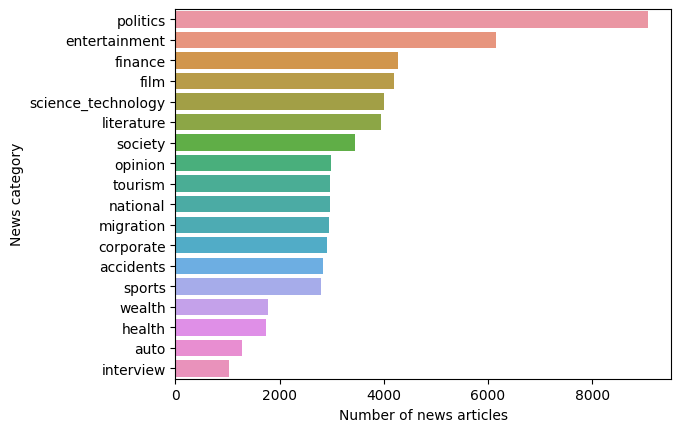

In [9]:
ax = plt.subplot()

sns.barplot(y = 'index', x = 'main_topic', data = number_of_articles_per_class)
plt.xlabel("Number of news articles")
plt.ylabel("News category")

It looks like news belonging to politics category are the most published kind in Nepal. Similarly, entertainment and finance related news are the most publised. Wealth, health and interview related news are least published. There seems to be significant class imbalance when we compare the number of data points present in politics and interview class. 

<b>Class imbalance</b> will make model being biased towards majority class, which is not good for generalization of the model.
Lets clean the texts first.

In [10]:
df

content  \
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेट...   
1      ट्याक्टर दुर्घटना हुँदा बैतडीमा दुई जनाको मृत्...   
2      भक्तपुरमा आज बिहान सवारी दुर्घटना हँदा एक जनाक...   
3      बैतडी बिहीवार ट्याक्टर दुर्घटना हुँदा चालकको घ...   
4      बैतडीको सुनर्या गाउँपालिका–७ आलुगैरामा जिप दुर...   
...                                                  ...   
61340  काठमाडौँ । मेगा बैंक नेपाल लिमिटेडले ‘मेगा रेम...   
61341  काठमाडौं । नेपालको विश्वसनीय इलेक्ट्रोनिक्स ब्...   
61342  नेपाल राष्ट्र बैंकले २०७७ असोज मसान्तभित्रमा ए...   
61343  काठमाडौं । साना–साना गल्ली, गल्लीभित्र सानो पस...   
61344  काठमाडौं । डिजिटल फन्ड ट्रान्फरको दुनियाँमा कन...   

                                                 heading main_topic  
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरबाट ट्रक खस्...  accidents  
1      ट्याक्टर दुर्घटना हुँदा दुई जनाको घटनास्थलमै म...  accidents  
2      भक्तपुरमा भैंसी बोकेको ट्रक दुर्घटना, ढोकाले च...  accidents  
3                 ट्याक्टर दुर्घटना हुुँदा चालकको मृत्यु  accidents  
4      बैतडीमा जिप दुर्घटना : चालकको घटनास्थलमै मृत्य...  accidents  
...                                                  ...        ...  
61340              मेगा बैंकले ल्यायो हातैमा रेमिट्यान्स     wealth  
61341              सामसङ QLED टिभिको प्रि–बुकिङ्ग खुल्ला     wealth  
61342  बैंकहरूले सार्वजनिक गरे स्थिर ब्याजदर, कसको कति ?     wealth  
61343  चम्किँदै सस्तो बजार, ब्रान्डेड सामान बेच्नेहरु...     wealth  
61344     फन्ड ट्रान्फरमा लोकप्रिय बन्दै ‘कनेक्ट आईपीएस’     wealth  

[61345 rows x 3 columns]

<b> Lets look at the wordclouds for each news categories below.

In a word cloud visualization, the size of each word corresponds to its frequency or importance in the text. The words with the highest frequency in the dataset will have the largest size in the word cloud, making them more prominent and visually emphasized.

In [19]:
from tqdm import tqdm
!pip install wordcloud --quiet

In [23]:
from wordcloud import WordCloud

  0%|          | 0/18 [00:00<?, ?it/s]

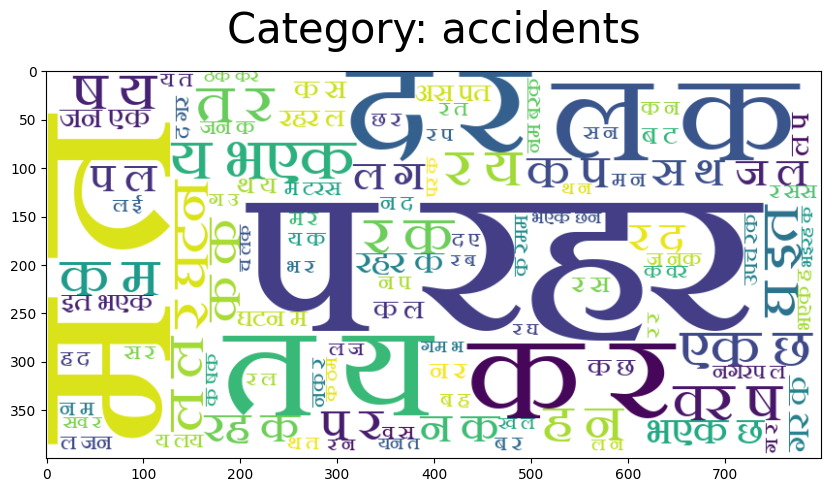

  6%|▌         | 1/18 [00:05<01:36,  5.69s/it]

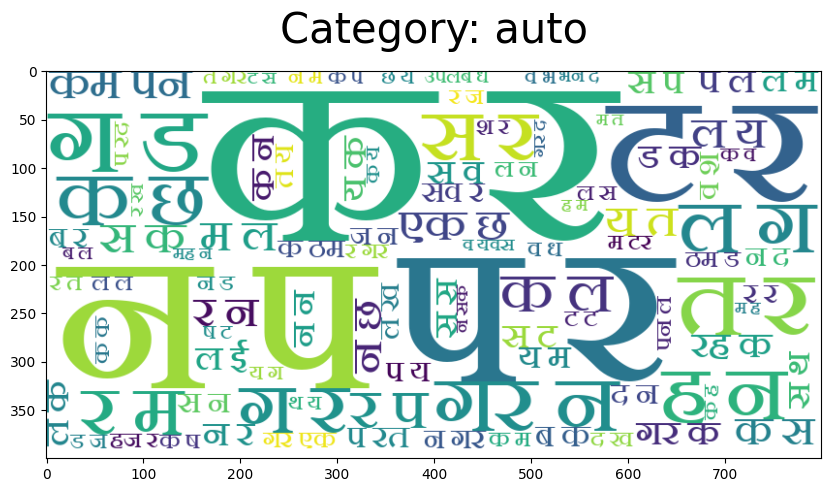

 11%|█         | 2/18 [00:15<02:07,  7.97s/it]

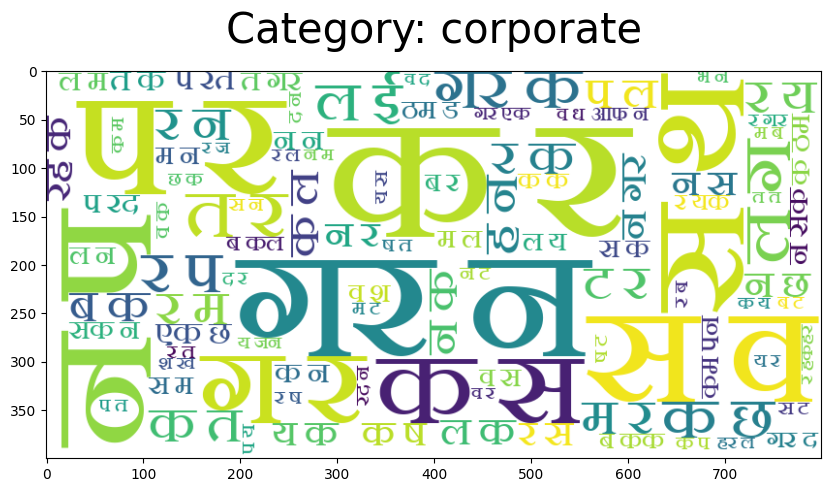

 17%|█▋        | 3/18 [00:20<01:41,  6.79s/it]

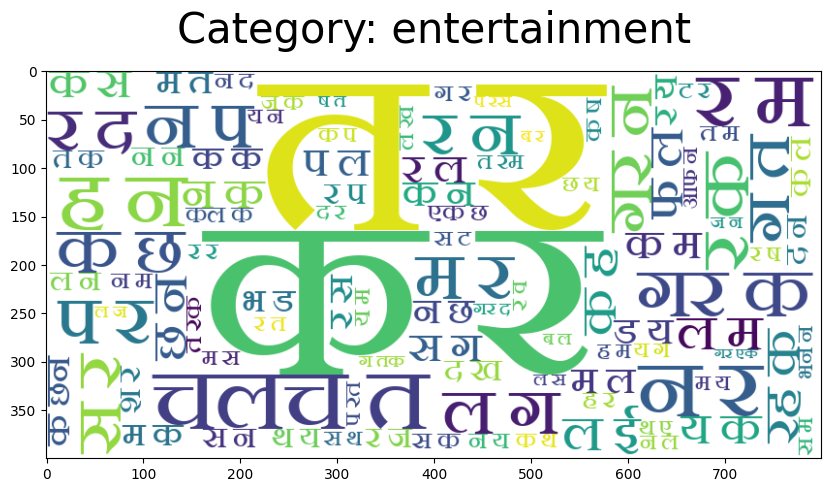

 22%|██▏       | 4/18 [00:31<01:56,  8.34s/it]

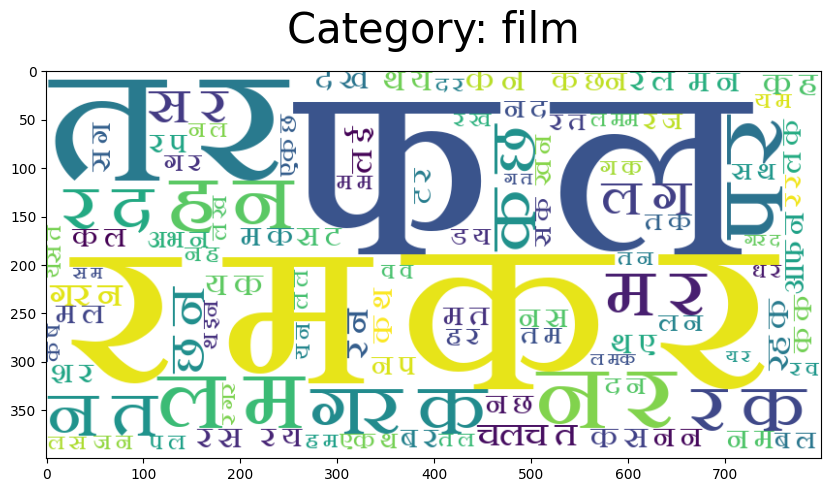

 28%|██▊       | 5/18 [00:38<01:41,  7.81s/it]

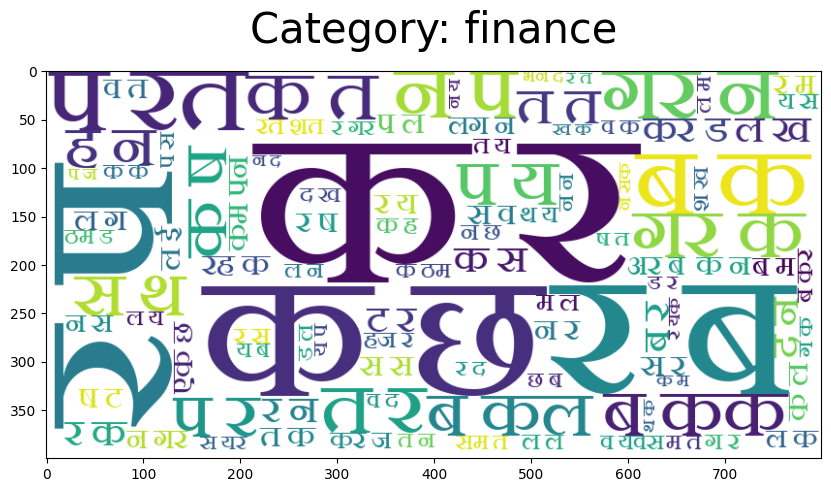

 33%|███▎      | 6/18 [00:46<01:36,  8.06s/it]

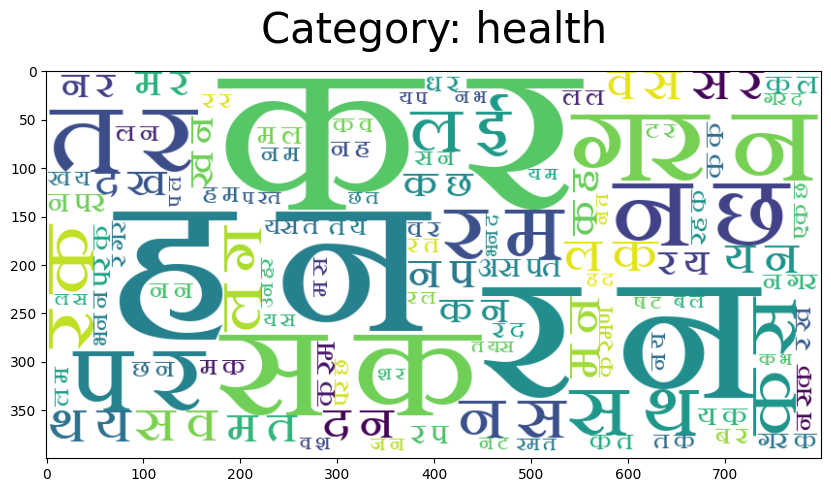

 39%|███▉      | 7/18 [00:53<01:23,  7.61s/it]

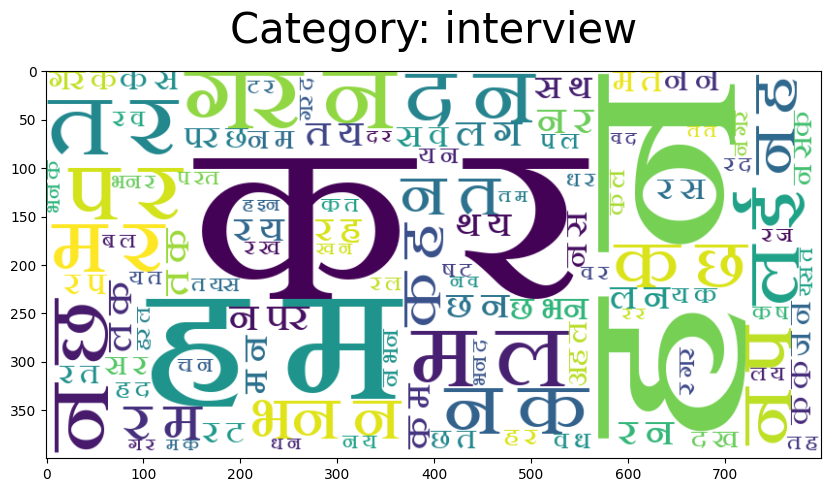

 44%|████▍     | 8/18 [01:04<01:26,  8.70s/it]

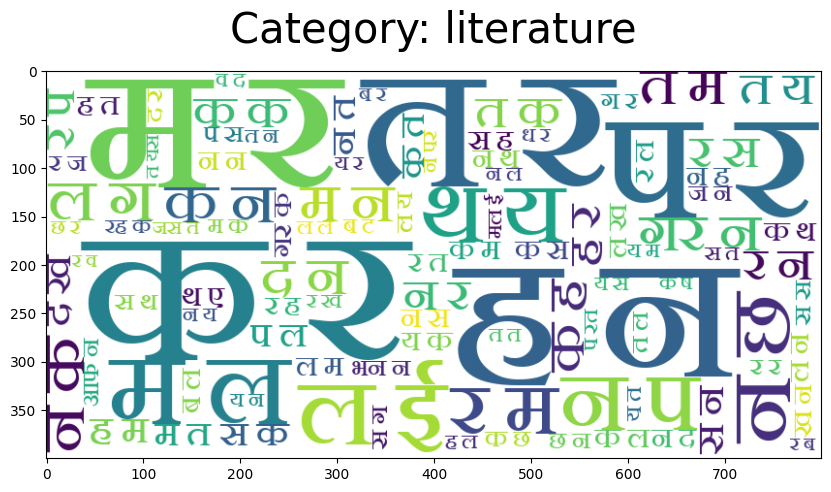

 50%|█████     | 9/18 [01:21<01:42, 11.35s/it]

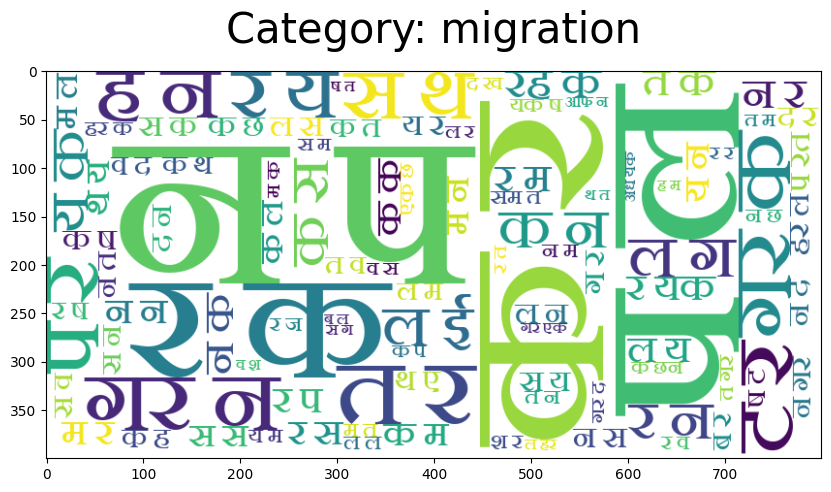

 56%|█████▌    | 10/18 [01:30<01:24, 10.57s/it]

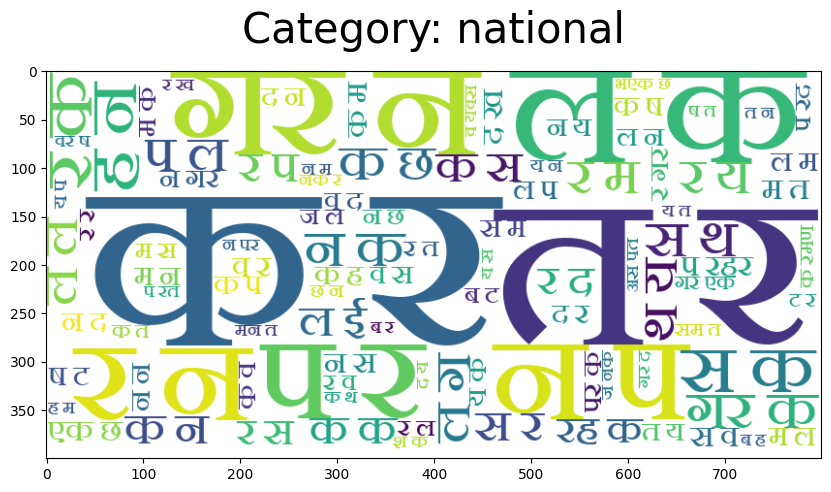

 61%|██████    | 11/18 [01:38<01:08,  9.78s/it]

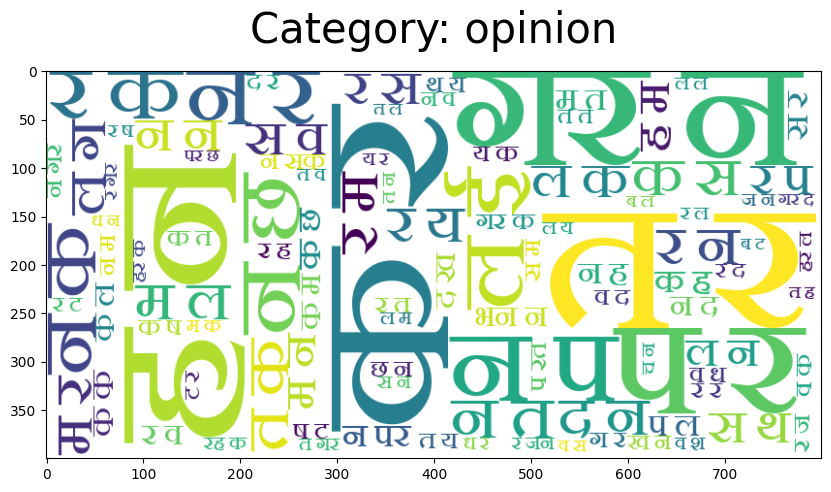

 67%|██████▋   | 12/18 [02:07<01:34, 15.76s/it]

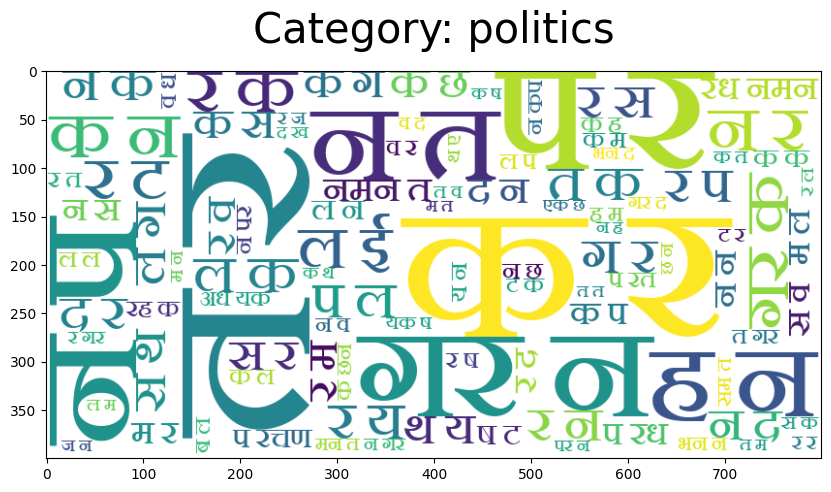

 72%|███████▏  | 13/18 [02:26<01:23, 16.70s/it]

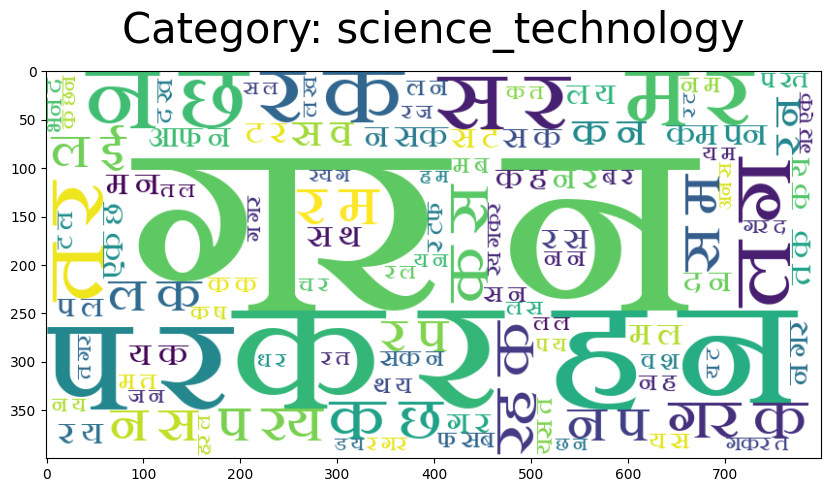

 78%|███████▊  | 14/18 [02:37<00:59, 14.81s/it]

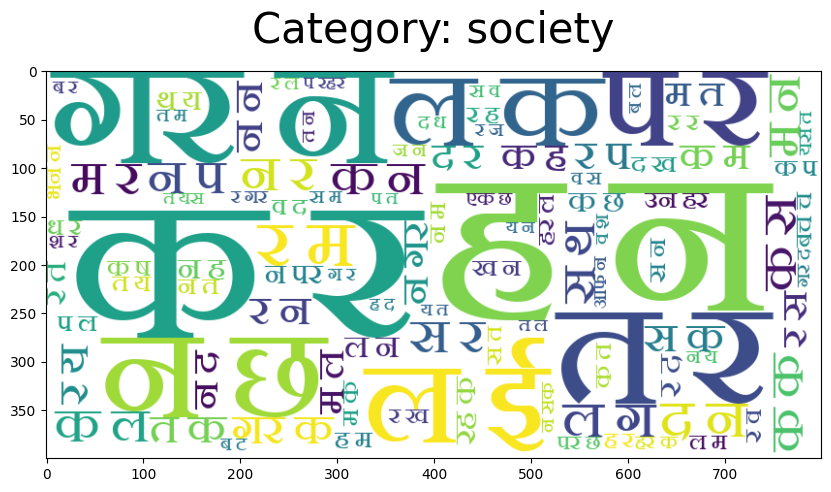

 83%|████████▎ | 15/18 [02:48<00:40, 13.64s/it]

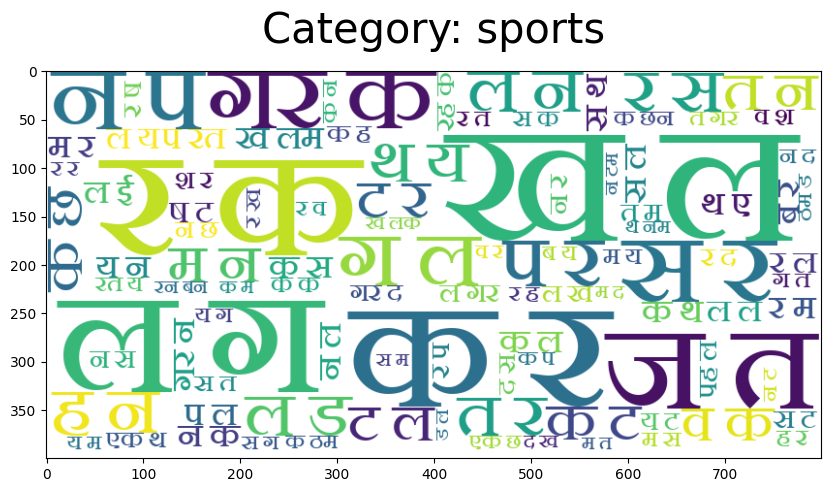

 89%|████████▉ | 16/18 [02:52<00:21, 10.96s/it]

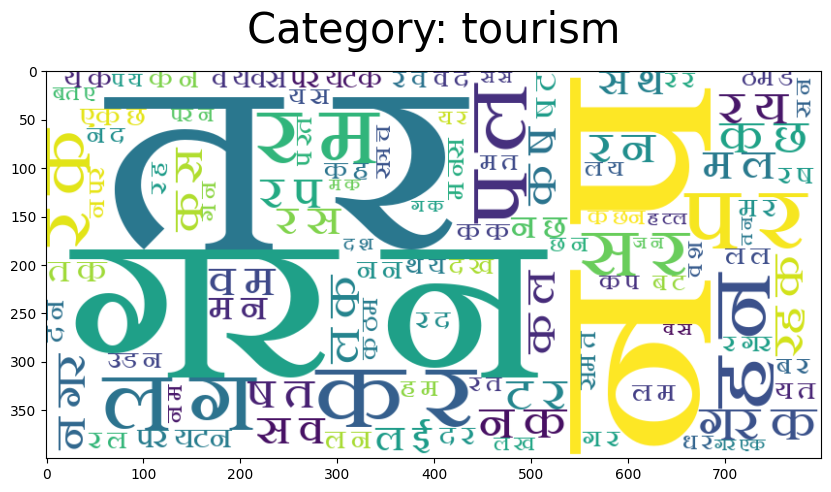

 94%|█████████▍| 17/18 [03:02<00:10, 10.48s/it]

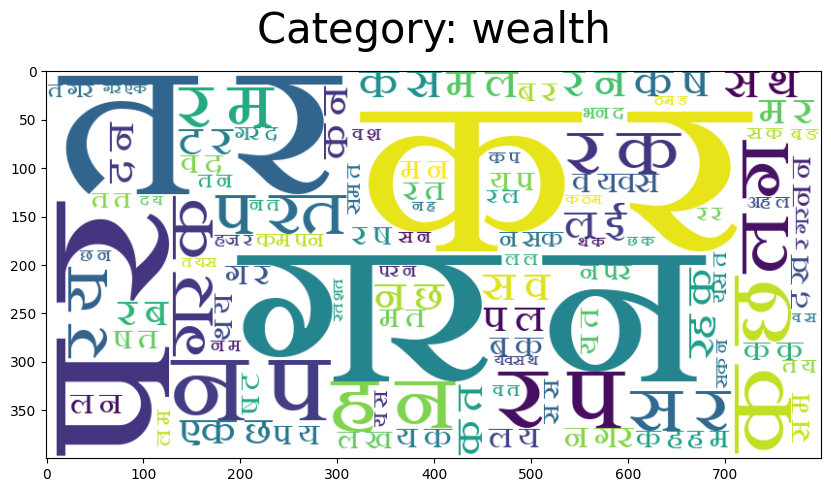

100%|██████████| 18/18 [03:07<00:00, 10.42s/it]


In [25]:
for val in tqdm(df.main_topic.unique()):
    df_local = df[df.main_topic == val]
    wordcloud = WordCloud(font_path=r"Aparajita.ttf", background_color='white', max_words=100, width=800, height=400).generate(' '.join(df_local.content.values))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Category: "+ val, fontsize = 30, pad = 20)
    # plt.axis('off')
    plt.show()
    # break

<b> The wordclouds above don't seem to cleary showcase words with highest frequencies for each news category. The original wordcloud didn't support this and I had to download fonts from thirdparty sources, but I kept on getting these unclear wordclouds regardless of different fonts. Nontheless, I kept these plots.

# Data Cleaning

In [26]:
nepali_sentence = df.content.iloc[0];nepali_sentence

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ।'

## Converting to lowercase

In this case, since Nepali characters do not have well-defined uppercase or lowercase forms, the word remains the same in both uppercase and lowercase representations. Unlike in english language where ENGLISH would be uppercase and english would be lowercase, this distictions does not generally apply in nepali words. Therefore this sections will be passed.

In [27]:
def lower_order(text):
    return text

## Removing URLs from the text

In [28]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [29]:
remove_urls(nepali_sentence+" https://sujanneupane.com")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। '

This custom function to remove URLs does work.

## Remove HTML tags

In [30]:
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

In [31]:
rm_html(nepali_sentence+" <html><br>")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। '

## Remove Emojis



In [32]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [33]:
text_with_emoji =  nepali_sentence+ " 😊 🍕🍕"
text_with_emoji

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। 😊 🍕🍕'

In [34]:
emoji_removed = remove_emoji(text_with_emoji)
print(emoji_removed)

कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ।    


## Remove Unwanted Characters



In [35]:
def remove_unwanted_characters_nepali(document):
    # remove user mentions
    document = re.sub("@[^\s]+", " ", document)
    # remove hashtags
    document = re.sub("#[^\s]+", "", document)
    # remove punctuation (except for Nepali Unicode characters)
    document = re.sub("[^\u0900-\u097F0-9A-Za-z\s]", "", document)
    # remove emojis
    document = remove_emoji(document)
    
    # remove double spaces
    document = document.replace('  ', "")
    document = re.sub(r"[^\w\s]", "", document)
    return document.strip()

In [36]:
text = nepali_sentence +" @! #";text

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। @! #'

In [37]:
remove_unwanted_characters_nepali(text)

'कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघटन हद चलकसहत तनक मतय भएक छ नवलपरस बरदघटससतपरवक गडकट३ क भकरफटसथत सत भरबट बधवर बहन न ३ ख ५३३९ नमबरक टरक सय मटर तल खसक परहरल जनएक छ लहन कनसटरकसनक समनट बकन टरक बलङटर गउपलकक खमबसबट फरकद गरद दरघटनम परक जलल परहर करयलयक परवकत महनबहदर खणल जनकर दए दरघटनम पर टरक चलक मकवनपरक हटड१७ क ४५ वरषय सरश भजल सह सथनक ३५ वरषय बलरम शरषठ र परसक ठर घर भएक ५० वरषय भमबहदर तमङक मतय भएक खणल बतए दरघटनक करण पतत नलग पन टरक अनयनतरत भई पलटएक हनसकन परहरल जनएक छ'

## Remove unnecessary whitespaces

In [38]:
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

In [39]:
rm_whitespaces(nepali_sentence+"           "+"New whitespaces were added before this english sentence")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। New whitespaces were added before this english sentence'

## Remove Punctutations



In [40]:
def remove_punctuations_nepali(sentence):
    punctuations = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।॥"""
    return re.sub('[' + re.escape(punctuations) + ']', '', sentence)

In [41]:
text = "नमस्ते! के छ तपाईंको नाम? म सन्चै खुशी छु।"
cleaned_text = remove_punctuations_nepali(text)
print(cleaned_text)

नमस्ते के छ तपाईंको नाम म सन्चै खुशी छु


## Remove Stopwords



In [42]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [43]:
stop_words = set(stopwords.words('nepali'));list(stop_words)[:10]

['भन्',
 'आफू',
 'तत्काल',
 'कि',
 'भन्छन्',
 'भर',
 'तिमी',
 'पर्छ',
 'अन्यत्र',
 'आफ्नो']

In [44]:
custom_stopwords = ['छ', 'हो', 'ले', 'को']
stop_words.update(custom_stopwords)

In [45]:
def remove_stopwords_nepali(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# def remove_stopwords_nepali(text_tokens):
#     result_tokens = []
#     for token in text_tokens:
#         if token not in stop_words:
#             result_tokens.append(token)
#     return result_tokens

In [46]:
text = "हामीले त्यो काम गर्ने थियौं की नि?"
cleaned_text = remove_stopwords_nepali(text)
print(cleaned_text)

हामीले काम थियौं की ?


## Stemming vs Lemmatization

In stemming, we simply slice a particular word to reduce the number of duplicates; The word playing could be stemmed to play which will reduce the number of words in our vocabulary. Stemming is much faster than lammatization whereas it is not that accurate.

In Lemmatization, we have to convert each word to its root form; playing could me lemattized to play or plays to play. However, it is slower than stemming as we have to find the root word. But, this also makes it more accurate.

Unlike english langauge which could be easily lemmatized or stemmed, this feature is not available in nltk.
<b> After doing a through reseach, I found a python package called nepali-stemmer

In [47]:
!git clone https://github.com/oya163/nepali-stemmer.git

Cloning into 'nepali-stemmer'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 117 (delta 47), reused 76 (delta 20), pack-reused 0
Receiving objects: 100% (117/117), 158.65 KiB | 2.37 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [48]:
cd nepali-stemmer

/content/nepali-stemmer


In [49]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 5.12.0
    Uninstalling importlib-resources-5.12.0:
      Successfully uninstalled importlib-resources-5.12.0


In [50]:
from nepali_stemmer.stemmer import NepStemmer
nepstem = NepStemmer()

In [51]:
nepstem.stem("नेपालको एमाले पार्टीका झोले, मण्डलेहरु अमेरिका आउने रे !")

'नेपाल को एमाले पार्टी का झोले, मण्डले हरु अमेरिका आउने रे !'

<b> The dataset that I have is not very big, which is why I wanted to use Lemmatization. But, I couldn't find the appropriate package offering such faeture for a nepali dataset. After a through reading of multiple research articles, I came accross a python package offered in this github repositiory that provided stemming in Nepali.
    
    Link to GitHub: https://github.com/oya163/nepali-stemmer

Therefore, I decided to use Stemming as I couldn't get appropriate method for performing lemmatization on nepali sequences.

In [52]:
def nepali_stemming(text):
  return nepstem.stem(text)

## Removing Nepali Numbers

Since I am doing nepali news classifcation, there may not be a necessecity to include raw nepali numbers.

In [54]:
import re

def remove_nepali_numbers(text):
    # Regular expression pattern to match numeric characters in Nepali script
    pattern = r'[०-९]'

    # Remove numeric characters using regex substitution
    text_without_numbers = re.sub(pattern, '', text)
    
    return text_without_numbers

# Example usage
nepali_text = "नेपाली न्यूज़ २०२३"
text_without_numbers = remove_nepali_numbers(nepali_text)
print(text_without_numbers)

नेपाली न्यूज़ 


## Tokenization

In [55]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# preprocessing
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Custom Pipeline to clean text



lower_order, remove_urls, rm_html, remove_emoji, remove_unwanted_characters_nepali, rm_whitespaces, remove_punctuations_nepali, remove_stopwords_nepali, stemming, tokenize

In [56]:
def custom_cleaning_pipeline(string):   
    string = lower_order(string)
    string = remove_urls(string)
    string = rm_html(string)
    string = remove_emoji(string)
    string = remove_unwanted_characters_nepali(string)
    string = remove_punctuations_nepali(string)
    string = remove_nepali_numbers(string)
    string = rm_whitespaces(string)
    
    string = remove_stopwords_nepali(string)
    string = tokenize(string)
    string = nepali_stemming(" ".join(string))

    return string

In [57]:
# def custom_preprocessing_pipeline(string):
    
#     return stemized_text

In [58]:
text = df.content.sample(1).values[0];text

'काठमाडौं । ०७४ को निर्वाचनमा बर्दिया २ बाट सांसदमा पराजित भएपछि उपाध्यक्ष गौतम निरन्तर सांसद बन्ने कोशिसमा लागेका थिए । निर्वाचनअगावै आफूलाई भावी प्रधानमन्त्रीका रुपमा उभ्याउन खोजेका गौतमले त्यही महत्वकांक्षा पूरा गर्ने योजनाका लागि एक दर्जनभन्दा बढि प्रतिनिधिसभाको निर्वाचन क्षेत्रमा उम्मेद्वारीका लागि कोशिस गरेका थिए । डोल्पाहुँदै काठमाडौं–७ सम्मको कोशिस असफल भएपछि उनले गत १८ पुसमा बसेको सचिवालय बैठकमा भने प्रधानमन्त्री बन्ने शर्तमा मात्र राष्ट्रियसभामा जाने प्रस्ताव गरेपछि बैठकले शर्त अस्वीकार गरेको थियो ।\xa0 गौतमलाई राष्ट्रियसभामा लैजाने कोशिस भने गत कात्तिकतिरैबाट सुरु भएको हो । प्रधानमन्त्री ओलीले पहिलो पटक गौतमलाई अनौपचारिक हिसाबले सांसद बनाउने प्रस्ताव गरेका थिए । तर, उनी पार्टीभित्रको समीकरणमा अध्यक्ष प्रचण्डतिर खुल्दै गए । २४ पुसमा भैंसेपाटीस्थित उनकै निवासमा बसेको सचिवालयका बहुमत सदस्यको बैठकमा गौतमलाई राष्ट्रिय सभामा पठाउने भद्र सहमति भयो\u202f। बहुमत नेताको साथ पाएका गौतमले पार्टीमा सर्त राखे–राष्ट्रिय सभाका सांसदले पनि प्रधानमन्त्री बन्न पाउनेगरी संविधान संशोधन गरिनुपर्न

In [59]:
text1 = custom_cleaning_pipeline(text)
text1
# text1 = custom_preprocessing_pipeline(text1);text1

'कठमड क नरवचनम बरदय बट ससदम परजत भएपछ उपधयकष गतम नरनतर ससद बनन कशसम लगक थए नरवचनअगव आफलई भव परधनमनतरक रपम उभयउन खजक गतमल तयह महतवककष पर गरन यजनक लग दरजनभनद बढ परतनधसभक नरवचन कषतरम उममदवरक लग कशस गरक थए डलपहद कठमड सममक कशस असफल भएपछ उनल गत पसम बसक सचवलय बठकम परधनमनतर बनन शरतम मतर रषटरयसभम जन परसतव गरपछ बठकल शरत असवकर गरक थय गतमलई रषटरयसभम लजन कशस गत कततकतरबट सर भएक ह परधनमनतर ओलल पहल गतमलई अनपचरक हसबल ससद बनउन परसतव गरक थए उन परटभतरक समकरणम अधयकष परचणडतर खलद पसम भसपटसथत उनक नवसम बसक सचवलयक बहमत सदसयक बठकम गतमलई रषटरय सभम पठउन भदर सहमत भय बहमत नतक सथ पएक गतमल परटम सरत रखरषटरय सभक ससदल पन परधनमनतर बनन पउनगर सवधन सशधन गरनपरन मसरदख पससमम चलक सचवलय बठकल गतमक परसतवमथ समनय छलफल पन सवधन सशधनक परसतव असवकर गरक थय यदयप गतमक सरतम सकरतमक बनक परचणडल पहल लन आशवसन दए पन सचवलयम सवधन सशधनबर सकरतमक धरण बनन तयसपछ पसक सचवलय बठकल गतमबहक जनलई मघम हन रषटरय सभ नरवचनक लग उममदवर तय गय आफलई परधनमनतर बनउन शरतम मतर जन तयर रहक अडन रखक थए डढ महनक बचम गतम बदलए पन रषटरयसभ सदसय मननत हन तयर फगनक सचवलय बठकल गतमलई रषटरयसभम 

In [60]:
# text = lower_order(text)
# text = remove_urls(text)
# text = rm_html(text)
# text = remove_emoji(text)
# text = remove_unwanted_characters_nepali(text)
# text =  remove_punctuations_nepali(text)
# text = remove_nepali_numbers(text)
# text = rm_whitespaces(text)
# text

In [61]:
from tqdm import tqdm

In [62]:
# def custom_cleaning_pipeline(string):   
#     string = lower_order(string)
#     string = remove_urls(string)
#     string = rm_html(string)
#     string = remove_emoji(string)
#     string = remove_unwanted_characters_nepali(string)
#     string = remove_punctuations_nepali(string)
#     string = remove_nepali_numbers(string)
#     string = rm_whitespaces(string)
    
#     string = remove_stopwords_nepali(string)
#     string = tokenize(string)
#     string = nepali_stemming(" ".join(string))

#     return string


# new = []
# for i, val in tqdm(enumerate(df.content.values)):
#   if i == 69:
#     print(val)
#     print("\n")
#     print(custom_cleaning_pipeline(val))

#     break

In [63]:
%%time

df['content_cleaned'] = df.content.apply(lambda y : custom_cleaning_pipeline(y))

CPU times: user 4min 16s, sys: 641 ms, total: 4min 16s
Wall time: 4min 27s


In [64]:
df = df[['content_cleaned', 'main_topic']]
df.head()

content_cleaned main_topic
0  कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघट...  accidents
1  टयकटर दरघटन हद बतडम दई जनक मतय भएक मतय हनम मलल...  accidents
2  भकतपरम आज बहन सवर दरघटन हद जनक मतय भएक घटनम पर...  accidents
3  बतड बहवर टयकटर दरघटन हद चलकक घटनसथलम मतय भएक म...  accidents
4  बतडक सनरय गउपलक आलगरम जप दरघटन हद जनक मतय भएक ...  accidents

# Encoding

Computers don't understand text. We need to convert them into numerical form before feeding the texutal data into our model. There are several ways we can perform encoding with each method having its own advantages and disadvantages. Some of the methods are given below.

1. Index based Encoding

  In index based encoding, we assign index position to each token in a sequence based on index position of the word present in the entire vocabulary. It is pretty straightforward and simple to understand. However, it doesn't capture semantic relationships or contextual information between words. It also loses the information about word frequency or distribution.


2. One Hot Encoding

  OHE involves creating a vocabulary of unique words and assigning each word a unique index. To encode a text, a one-hot encoding matrix is created with dimensions (number of words) x (vocabulary size). Each word in the text is then represented by a binary vector, where the element corresponding to its index in the vocabulary is set to 1, and all other elements are set to 0. This encoding method is simple but results in high-dimensional sparse vectors, and it does not capture semantic relationships or contextual information between words.


3. TF-IDF (Term Frequency Inverse Document frequency), Word2Vec, Word Embeddings etc.

<b><font color='red'>For simplicity, I have decided to use Index based encoding for this task. But, I do acknowledge it is not very effective method to encode text data as it cannot capture semantic relationship between words in a sequence.</font>

In [65]:
df.head()

content_cleaned main_topic
0  कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघट...  accidents
1  टयकटर दरघटन हद बतडम दई जनक मतय भएक मतय हनम मलल...  accidents
2  भकतपरम आज बहन सवर दरघटन हद जनक मतय भएक घटनम पर...  accidents
3  बतड बहवर टयकटर दरघटन हद चलकक घटनसथलम मतय भएक म...  accidents
4  बतडक सनरय गउपलक आलगरम जप दरघटन हद जनक मतय भएक ...  accidents

In [66]:
# lets get all of the cleaned content values
complete_content = df.content_cleaned.values

In [67]:
# combining all words with whitespaces as seperation
all_words = ' '.join(complete_content)

In [68]:
len(all_words)

85791015

In [69]:
# converting to the list
all_words = all_words.split()

In [70]:
# removing duplicates
all_words = list(set(all_words))

In [71]:
# lets too at first 20 words
all_words[:20]

['अगरणहरल',
 'नजककहरसगक',
 'नवदनलई',
 'रपडयतर',
 'एआईसग',
 'ढलईक',
 'मजफफरनगरक',
 'असथलई',
 'परसदअमत',
 'उपकषभव',
 'झडकरद',
 'ठगनलगयतसमत',
 'परटचह',
 'हरयहरय',
 'परदशहरमधय',
 'चहनसब',
 'मरछनतर',
 'तनहरमरफत',
 'टयकससहत',
 'चकचक']

In [72]:
from collections import Counter

Next, we will proceed to get the number of counts a word appears in the text corpus. We can calculate that using Counter library, which is a built-in python library. We will proceed to start the index of our unique words from 1. This is so to make sure that we will use the index postiion 0 for the padding <PAD> token.

In [73]:
# passing all words to Counter function to count the frequency of each word in the list.
counter = Counter(all_words)

In [74]:
''' 
We are creating a list that is sorted in the descending order based on the frequency of the words occurrance. 
'''

frequency_of_words_sorted = sorted(counter, key=counter.get, reverse=True)

In [75]:
# creates a dictionary that maps integer IDs to each word in the vocabulary. The enumerate function assigns a unique integer ID to each word, starting from 1.
converting_integers_and_words = dict(enumerate(frequency_of_words_sorted, 1))

In [76]:
# here, we add a padding token with ID 0 to the dictionary, which will be used later for padding sequences of different lengths.
converting_integers_and_words[0] = '<PAD>' 

In [77]:
# this code will create a dictionary that maps each word in the vocabulary to its corresponding integer ID.
converting_integers_and_words = {word: id for id, word in converting_integers_and_words.items()}

Now, we will proceed to encode the reviews. we will do so by convert each token into different corresponding index in the vocabulary array.


In [78]:
# Let us encode each word
encoded_contents = [[converting_integers_and_words[word] for word in individual_content.split()] for individual_content in tqdm(complete_content)]

100%|██████████| 61345/61345 [00:05<00:00, 10950.52it/s]


In [79]:
unique_lengths = set([len(i) for i in encoded_contents]);len(unique_lengths)

2207

<b> This further proves that we need to ensure all sequences are of equal length, which we will do later



In [80]:
# lets print the first 10 words of the first 10 reviews we have in our data 
for i in range(0, 10):
    print(encoded_contents[i][:10])

[102662, 110022, 324937, 300832, 325095, 142077, 330539, 48058, 303456, 325729]
[108920, 325729, 336129, 354494, 230265, 46261, 1063, 256891, 1063, 343954]
[82935, 13247, 100930, 127446, 325729, 336129, 46261, 1063, 256891, 104694]
[213651, 73767, 108920, 325729, 336129, 379818, 372353, 1063, 256891, 1063]
[3944, 404571, 91103, 109649, 361787, 325729, 336129, 46261, 1063, 256891]
[77270, 325729, 336129, 90468, 223554, 195347, 30681, 198823, 1063, 256891]
[240467, 367725, 91103, 160829, 91942, 303456, 146443, 176886, 262159, 146443]
[31816, 444069, 63061, 305415, 71157, 95800, 183596, 349391, 13247, 46261]
[324230, 216970, 343692, 166654, 195347, 127446, 193197, 389152, 114351, 349391]
[106108, 305415, 26988, 82232, 95800, 311947, 342103, 358283, 325729, 336129]


Here, we have sucessfully converted the text in each row into individual tokens based on index positions in our vocabulary. However, our tokens are of different lengths. Meaning that not all news have the same length. Some might be too large whereas some will be very smaller. Therefore, we need to predefine the maximum possible length of any given sequence. If a particular news is shorter than the predefined length, we will proceed to pad the sequence else we will trim the sequence  respetively.

In [81]:
import numpy as np

In [82]:
# padding sequences
def padding_sequences(cleaned_text, padding_value, max_length_of_sequence=256):
    '''
    The code below will create a 2D numpy array called new_feature with dimensions (len(reviews), seq_length), filled with the padding ID pad_id. 
    Therefore, we can use this 2d array to replace the corresponidng sequences at respective indexes whereas unused elements for sequences shorter than 256 will be padded.
    '''
    new_feature = np.full((len(cleaned_text), max_length_of_sequence), padding_value, dtype=int)
    '''
    pads each sequence with the padding ID pad_id up to the desired seq_length. The code first converts the current sequence to a
      numpy array using np.array(row), then takes the first seq_length elements (if the sequence is longer than seq_length), and assigns 
      this to the corresponding row in features. This way, sequences shorter
      than seq_length are padded with the pad_id at the end of the sequence, and longer sequences are truncated to seq_length.
    '''
    for i, row in enumerate(cleaned_text):
        new_feature[i, :len(row)] = np.array(row)[:max_length_of_sequence]
    return new_feature

In [83]:
max_length_of_sequence = 256

# returns the final 2D numpy array where each row represents a padded sequence.
features = padding_sequences(encoded_contents, padding_value=converting_integers_and_words['<PAD>'], max_length_of_sequence=max_length_of_sequence)

In this case, the maximum sequence length of 256 was likely chosen based on available hardware resources. A sequence length of 256 is relatively long and should be sufficient to capture most of the information in the input data, while still being computationally tractable. We also have to consider the limitations of our hardware becuase longer sequencecs could contain more information, but also might be more computationally expensive. Whereas, shorter sequences might be less computationally expensive but might contain very less information. So, choosing the maximum length of a sequence depends upon a variety of factors respectively.

In [84]:
df.main_topic.value_counts()

politics              9068
entertainment         6163
finance               4281
film                  4197
science_technology    4007
literature            3950
society               3457
opinion               2991
tourism               2976
national              2965
migration             2951
corporate             2908
accidents             2826
sports                2787
wealth                1771
health                1740
auto                  1282
interview             1025
Name: main_topic, dtype: int64

<b> Since there are 18 different categories, our vanilla RNN, which is already not very stable due to being prone to vanishing and exploding gradient problems, I have decided to re-categorize these 18 news categories in following 4 sub-categories

1. News & Current Affairs
2. Entertainment & Arts
3. Business & Finance
4. Lifestyle & Travel

In [85]:
category_mapping = {
    'politics': 'News & Current Affairs',
    'entertainment': 'Entertainment & Arts',
    'finance': 'Business & Finance',
    'film': 'Entertainment & Arts',
    'science_technology': 'News & Current Affairs',
    'literature': 'Entertainment & Arts',
    'society': 'News & Current Affairs',
    'opinion': 'Lifestyle & Travel',
    'tourism': 'Lifestyle & Travel',
    'national': 'News & Current Affairs',
    'migration': 'Lifestyle & Travel',
    'corporate': 'Business & Finance',
    'accidents': 'News & Current Affairs',
    'sports': 'Entertainment & Arts',
    'wealth': 'Business & Finance',
    'health': 'Lifestyle & Travel',
    'auto': 'Lifestyle & Travel',
    'interview': 'News & Current Affairs'
}
set(list(category_mapping.values()))

{'Business & Finance',
 'Entertainment & Arts',
 'Lifestyle & Travel',
 'News & Current Affairs'}

In [86]:
df.main_topic = df.main_topic.map(category_mapping)

<ipython-input-86-1306da9d113e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.main_topic = df.main_topic.map(category_mapping)


In [87]:
df.main_topic.value_counts()

News & Current Affairs    23348
Entertainment & Arts      17097
Lifestyle & Travel        11940
Business & Finance         8960
Name: main_topic, dtype: int64

In [88]:
number_of_articles_per_class = df.main_topic.value_counts().reset_index()
number_of_articles_per_class.sort_values("main_topic", ascending = False, inplace = True)

In [89]:
number_of_articles_per_class

index  main_topic
0  News & Current Affairs       23348
1    Entertainment & Arts       17097
2      Lifestyle & Travel       11940
3      Business & Finance        8960

Text(0, 0.5, 'Updated News category')

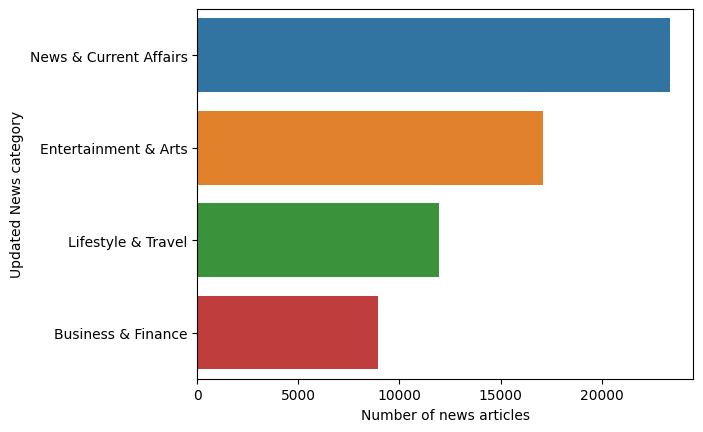

In [90]:
ax = plt.subplot()

sns.barplot(y = 'index', x = 'main_topic', data = number_of_articles_per_class)
plt.xlabel("Number of news articles")
plt.ylabel("Updated News category")

In [91]:
# get labels as numpy
targets = df.main_topic.to_numpy()
targets

array(['News & Current Affairs', 'News & Current Affairs',
       'News & Current Affairs', ..., 'Business & Finance',
       'Business & Finance', 'Business & Finance'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

targets1 = encoder.fit_transform(targets)

In [93]:
targets1

array([3, 3, 3, ..., 0, 0, 0])

In [94]:
targets

array(['News & Current Affairs', 'News & Current Affairs',
       'News & Current Affairs', ..., 'Business & Finance',
       'Business & Finance', 'Business & Finance'], dtype=object)

In [95]:
encoder.classes_

array(['Business & Finance', 'Entertainment & Arts', 'Lifestyle & Travel',
       'News & Current Affairs'], dtype=object)

# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets1, test_size=0.3, random_state=42)

In [98]:
# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [99]:
print("The shapes for Training set: ", X_train.shape, y_train.shape)

The shapes for Training set:  (42941, 256) (42941,)


In [100]:
print("The shapes for Validation set: ", X_val.shape, y_val.shape)

The shapes for Validation set:  (9202, 256) (9202,)


In [101]:
print("The shapes for Test set: ", X_test.shape, y_test.shape)

The shapes for Test set:  (9202, 256) (9202,)


We have successfully divided our data into train, test, and valdiation set. Now, we will proceed to convert it into pytorch dataloader with a certain batch size for performing minibatch gradient descent.

In [102]:
from torch.utils.data import TensorDataset, DataLoader
import torch

In [103]:
batch_size = 512

In [104]:
# Lets create tensordatasets
training_set = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
validation_set = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
testing_set = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [105]:
# lets proceed to create pytorch dataloaders next.
train_dl = DataLoader(training_set, shuffle=True, batch_size=batch_size)
val_dl = DataLoader(validation_set, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(testing_set, shuffle=True, batch_size=batch_size)

# Building Vanilla RNN

Traditional networks like a multi-layer perceptron can't work well with sequential data like text. Therefore, RNN or RNN based architectures are used.

In [110]:
import torch.nn.init as init
import torch.nn as nn

In [149]:
# Define the VanillaRNN model
class VanillaRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, device, vocab_size = len(all_words), ):
        super(VanillaRNN, self).__init__()

        '''
        *** input_size = length of each input sequence
        *** hidden_size = number of hidden neurons in RNN's recurrent layer
        *** output_size = number of output neurons that will decide the number of classes to be predicted 
        *** self.Wxh = the weights that will be applied to the input 
        *** self.whh = the weights that will be applied to the input coming into the recurrent layer
        *** self.why = the weights that will be applied to the final output
        *** self.bh and self.by = biases for input and outputs
        '''
        
        self.embedding_layer = nn.Embedding(vocab_size, input_size) # embedding_size = input_size
        self.hidden_size = hidden_size

        # randomly initializting parameters for the RNN
        self.Wxh = torch.nn.Parameter(init.xavier_uniform_(torch.Tensor(input_size, hidden_size))).to(device)
        self.Whh = torch.nn.Parameter(init.xavier_uniform_(torch.Tensor(hidden_size, hidden_size))).to(device)
        self.Why = torch.nn.Parameter(init.xavier_uniform_(torch.Tensor(hidden_size, output_size))).to(device)
        self.bh = torch.nn.Parameter(init.xavier_uniform_(torch.Tensor(1, hidden_size))).to(device)
        self.by = torch.nn.Parameter(init.xavier_uniform_(torch.Tensor(1, output_size))).to(device)


    def forward(self, x):
        '''
        hidden_size refers to the number of hidden units or the dimensionality of the hidden state in the RNN model. 
        It determines the capacity of the hidden layer to capture and represent information.

        Additionally, the n length of input sequence will result in the RNN being unrolled n times
        '''

        # Convert the input to a LongTensor
        x = x.long()
        
        # Embed the input sequence to a sequence of dense vectors of embedding_size
        x = self.embedding_layer(x)

        batch_size, seq_len, _ = x.size() # getting dimensions of the input tensor

        # Initialize hidden state
        h = torch.zeros(batch_size, self.hidden_size).to(device)

        # Iterate over the sequence
        for t in range(seq_len):
            xt = x[:, t, :]
            h = torch.tanh(torch.matmul(xt, self.Wxh) + self.bh) + torch.matmul(h, self.Whh)
            # h = torch.tanh(torch.matmul(xt, self.Wxh) + torch.matmul(h, self.Whh) + self.bh)

        # Output layer
        y = torch.matmul(h, self.Why) + self.by

        return y

In [150]:
# define training device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [151]:
input_size = 300 # or, embedding size, # Dimensionality of the word embeddings
hidden_size = 50
output_size = 4

model = VanillaRNN(input_size, hidden_size, output_size, device).to(device)

In [152]:
print(model)
print("Number of parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

VanillaRNN(
  (embedding_layer): Embedding(453728, 300)
)
Number of parameters: 136118400


In [153]:
test_val = training_set[0][0]
test_val = test_val.reshape(1, 256)
test_val = test_val.to(device)

In [154]:
model(test_val)

tensor([[ 2.5773e+25,  1.6432e+25,  1.6776e+25, -1.5312e+25]], device='cuda:0',
       grad_fn=<AddBackward0>)

<b> It looks like our model's forward propagation is working perfectly. Lets work on the entire model training next.

# Model Training

In [155]:
'''
The learning rate of 0.001 was selected with cross entropy as loss function.
Additionally,adam optimizer was choosen as the optimization function
'''
lr = 0.001
criterion = nn.CrossEntropyLoss()  
optim = torch.optim.Adam(model.parameters(), lr=lr)
grad_clip = 1
epochs = 20

In [156]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_loss = float('inf')
patience = 5
early_stopping_counter = 0

for epoch in range(epochs):

    model.train()

    train_loss = 0
    train_acc = 0

    for feature, target in tqdm(train_dl):
        # move to device
        feature, target = feature.to(device), target.to(device)

        # reset optimizer
        optim.zero_grad()

        # forward pass
        out = model(feature)

        # compute loss
        loss = criterion(out, target)
        train_loss += loss.item()
        loss.backward()

        # clip gradients
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        # update optimizer
        optim.step()

        # compute accuracy
        _, predicted = torch.max(out, dim=1)
        correct = (predicted == target).sum().item()
        acc = correct / target.size(0)
        train_acc += acc

        # free some memory
        del feature, target, predicted

    train_loss = train_loss / len(train_dl)
    train_acc = train_acc / len(train_dl)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for feature, target in val_dl:
            # move to device
            feature, target = feature.to(device), target.to(device)

            # forward pass
            out = model(feature)

            # compute loss
            loss = criterion(out, target)
            val_loss += loss.item()

            # compute accuracy
            _, predicted = torch.max(out, dim=1)
            correct = (predicted == target).sum().item()
            acc = correct / target.size(0)
            val_acc += acc

            # free some memory
            del feature, target, predicted

    val_loss = val_loss / len(val_dl)
    val_acc = val_acc / len(val_dl)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc*100:.4f}%")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc*100:.4f}%")

    # Early stopping
    if val_loss < best_val_loss:
        early_stopping_counter = 0
        best_val_loss = val_loss
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs without improvement.")
            break


100%|██████████| 84/84 [01:48<00:00,  1.29s/it]


Epoch 1:
Training Loss: 29077409678838394668449792.0000 | Training Accuracy: 27.2875%
Validation Loss: 28403916188703837674012672.0000 | Validation Accuracy: 27.1465%


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


Epoch 2:
Training Loss: 29087283271153333032714240.0000 | Training Accuracy: 27.2812%
Validation Loss: 28409270099966451160973312.0000 | Validation Accuracy: 27.1499%


100%|██████████| 84/84 [01:49<00:00,  1.30s/it]


Epoch 3:
Training Loss: 29085286273854793492463616.0000 | Training Accuracy: 27.2791%
Validation Loss: 28408134856591584482295808.0000 | Validation Accuracy: 27.1432%


100%|██████████| 84/84 [01:48<00:00,  1.30s/it]


Epoch 4:
Training Loss: 29086414105591419951382528.0000 | Training Accuracy: 27.2833%
Validation Loss: 28405346964291054771109888.0000 | Validation Accuracy: 27.1514%


100%|██████████| 84/84 [01:47<00:00,  1.29s/it]


Epoch 5:
Training Loss: 29082066054290380760809472.0000 | Training Accuracy: 27.2903%
Validation Loss: 28409530275919325537763328.0000 | Validation Accuracy: 27.1447%


100%|██████████| 84/84 [01:48<00:00,  1.29s/it]


Epoch 6:
Training Loss: 29081014919284321035485184.0000 | Training Accuracy: 27.2861%
Validation Loss: 28407948595717395298910208.0000 | Validation Accuracy: 27.1435%
Early stopping triggered after 5 epochs without improvement.


<b><font color='red'>I tried training the vanilla RNN with the content column, but it was very clear from the start that the model was suffering very badly due to exploding gradient problem. The Cross-Entropy loss was off the charts. Nonetheless, I trained the model for 5 epochs and early stopping implemented stopped training this model. 


Next, I Will try training same data with LSTM. If the problem persists with even LSTM, I would need to look for alternating preprocessing technique.</font>

# Building LSTM using PyTorch

In [158]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, output_size, hidden_size=128, embedding_size=300, n_layers=2, dropout=0.2):
        super(LSTM, self).__init__()

        # Define an embedding layer that maps each token to a dense vector of embedding_size
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size)

        # Define an LSTM layer with hidden_size hidden units, n_layers layers, and a dropout rate of dropout
        self.lstm_layer = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)

        # Define a dropout layer with dropout probability of dropout
        self.dropout_layer = nn.Dropout(p=dropout)

        # Define a linear layer that maps the output of the LSTM to the output_size
        self.fully_connected_laeyer = nn.Linear(hidden_size, output_size)

        # Define a sigmoid activation function
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, input_seq):
        
        # Convert the input to a LongTensor
        input_seq = input_seq.long()

        # Embed the input sequence to a sequence of dense vectors of embedding_size
        input_seq = self.embedding_layer(input_seq)

        # Feed the embedded sequence through the LSTM layer
        output, _ = self.lstm_layer(input_seq)

        # Select only the last output of the LSTM as the final output
        output = output[:, -1, :]

        # Apply dropout to the output
        output = self.dropout_layer(output)

        # Feed the output through the linear layer to get the logits
        output = self.fully_connected_laeyer(output)

        return output

In [159]:
# define training device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [162]:
# model hyperparamters
vocab_size = len(converting_integers_and_words)
output_size = 4
embedding_size = 300
hidden_size = 512
n_layers = 2
dropout=0.2
weight_decay=None

In [163]:
# model initialization
model = LSTM(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
model = model.to(device)
print(model)

LSTM(
  (embedding_layer): Embedding(453729, 300)
  (lstm_layer): LSTM(300, 512, num_layers=2, batch_first=True, dropout=0.2)
  (dropout_layer): Dropout(p=0.2, inplace=False)
  (fully_connected_laeyer): Linear(in_features=512, out_features=4, bias=True)
  (sigmoid_layer): Sigmoid()
)


In [164]:
model(test_val)

tensor([[ 0.0288,  0.0079,  0.0239, -0.0210]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

<b> Perfect!!! The forward propagation for our LSTM model is working just fine.

# Training LSTM

In [165]:
'''
The learning rate of 0.001 was selected with  cross entropy as loss function. 
Additionally,adam optimizer was choosen as the optimization function
'''
lr = 0.001
criterion = nn.CrossEntropyLoss()  
optim = torch.optim.Adam(model.parameters(), lr=lr)
grad_clip = 1
epochs = 20

In [166]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_loss = float('inf')
patience = 5
early_stopping_counter = 0

for epoch in range(epochs):

    model.train()

    train_loss = 0
    train_acc = 0

    for feature, target in tqdm(train_dl):
        # move to device
        feature, target = feature.to(device), target.to(device)

        # reset optimizer
        optim.zero_grad()

        # forward pass
        out = model(feature)

        # compute loss
        loss = criterion(out, target)
        train_loss += loss.item()
        loss.backward()

        # clip gradients
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        # update optimizer
        optim.step()

        # compute accuracy
        _, predicted = torch.max(out, dim=1)
        correct = (predicted == target).sum().item()
        acc = correct / target.size(0)
        train_acc += acc

        # free some memory
        del feature, target, predicted

    train_loss = train_loss / len(train_dl)
    train_acc = train_acc / len(train_dl)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for feature, target in val_dl:
            # move to device
            feature, target = feature.to(device), target.to(device)

            # forward pass
            out = model(feature)

            # compute loss
            loss = criterion(out, target)
            val_loss += loss.item()

            # compute accuracy
            _, predicted = torch.max(out, dim=1)
            correct = (predicted == target).sum().item()
            acc = correct / target.size(0)
            val_acc += acc

            # free some memory
            del feature, target, predicted

    val_loss = val_loss / len(val_dl)
    val_acc = val_acc / len(val_dl)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc*100:.4f}%")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc*100:.4f}%")

    # Early stopping
    if val_loss < best_val_loss:
        early_stopping_counter = 0
        best_val_loss = val_loss
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs without improvement.")
            break

100%|██████████| 84/84 [01:26<00:00,  1.03s/it]


Epoch 1:
Training Loss: 1.2864 | Training Accuracy: 37.9339%
Validation Loss: 1.2893 | Validation Accuracy: 34.5291%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 2:
Training Loss: 1.2457 | Training Accuracy: 40.1202%
Validation Loss: 1.1791 | Validation Accuracy: 43.6817%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 3:
Training Loss: 1.0142 | Training Accuracy: 58.2031%
Validation Loss: 0.8140 | Validation Accuracy: 67.8151%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 4:
Training Loss: 0.6946 | Training Accuracy: 73.8770%
Validation Loss: 0.6809 | Validation Accuracy: 74.5770%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 5:
Training Loss: 0.5195 | Training Accuracy: 80.5510%
Validation Loss: 0.5180 | Validation Accuracy: 80.2520%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 6:
Training Loss: 0.4139 | Training Accuracy: 84.8665%
Validation Loss: 0.4874 | Validation Accuracy: 81.9933%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 7:
Training Loss: 0.3650 | Training Accuracy: 87.1167%
Validation Loss: 0.4746 | Validation Accuracy: 83.8524%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 8:
Training Loss: 0.2958 | Training Accuracy: 89.8195%
Validation Loss: 0.4410 | Validation Accuracy: 83.6682%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 9:
Training Loss: 0.2503 | Training Accuracy: 91.5490%
Validation Loss: 0.4366 | Validation Accuracy: 84.3286%


100%|██████████| 84/84 [01:32<00:00,  1.11s/it]


Epoch 10:
Training Loss: 0.1944 | Training Accuracy: 93.7452%
Validation Loss: 0.4385 | Validation Accuracy: 85.2757%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 11:
Training Loss: 0.1522 | Training Accuracy: 95.1633%
Validation Loss: 0.4700 | Validation Accuracy: 85.9391%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 12:
Training Loss: 0.1147 | Training Accuracy: 96.5202%
Validation Loss: 0.4896 | Validation Accuracy: 85.4815%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 13:
Training Loss: 0.0925 | Training Accuracy: 97.2993%
Validation Loss: 0.4923 | Validation Accuracy: 86.1229%


100%|██████████| 84/84 [01:33<00:00,  1.12s/it]


Epoch 14:
Training Loss: 0.0680 | Training Accuracy: 98.1106%
Validation Loss: 0.5818 | Validation Accuracy: 85.2226%
Early stopping triggered after 5 epochs without improvement.


<b><font color='red'>The LSTM model performed much better than the unstable vanilla RNN. However, the model started to overfit on the training data due to which, the early stopping stopped the model training after 5 continuous epoch of validation loss diverging from the training loss.i.e valdiation loss not improving</font>

In [ ]:
pwd

In [173]:
cd ..

/content


In [174]:
training_stats = pd.DataFrame({"Training_Accuracy": train_accs,
                               "Training_Loss": train_losses,
                               "Val_Loss": val_losses,
                               "Val_Accuracy": val_accs})

In [175]:
training_stats.to_csv("TextClassification_ReCategorized_Statistics.csv", index = True)

In [176]:
torch.save(model.state_dict(), "LSTM_ReCategorized.pth")

In [178]:
import shutil
shutil.copy2("LSTM_ReCategorized.pth", '/content/drive/MyDrive/CodeHimalaya')
shutil.copy2("TextClassification_ReCategorized_Statistics.csv", '/content/drive/MyDrive/CodeHimalaya')

'/content/drive/MyDrive/CodeHimalaya/TextClassification_ReCategorized_Statistics.csv'

# making Test Predictions

In [181]:
def make_predictions_on_dataloaders(trained_model, dataloader):
    target = []
    probabilities = []
    predictions = []
    pred_probs_for_all_class = []
    
    with torch.no_grad():
        trained_model.eval()
        for images, labels in tqdm(test_dl):
            images, labels = images.to(device), labels.to(device)
            yb = trained_model(images)
            out = nn.Softmax(dim = 1)(yb)
            out = out.cpu()
            probs, preds  = torch.max(out, dim=1)
            preds = np.array(preds.cpu().detach())
            probs = probs.cpu().detach().numpy()
            labels = labels.cpu().detach().numpy()
            out = out.detach().numpy()

            target.append(labels)
            probabilities.append(probs)
            predictions.append(preds)
            pred_probs_for_all_class.append(out)
        
    return target, probabilities, predictions, pred_probs_for_all_class

In [182]:
target, probabilities, predictions, pred_probs_for_all_class = make_predictions_on_dataloaders(model, test_dl)

100%|██████████| 18/18 [00:05<00:00,  3.39it/s]


In [183]:
def flatten(input_arr):
    output = []
    for i in input_arr:
        for j in i:
            output.append(j)
    return output

In [184]:
predictions = flatten([list(i) for i in predictions])
target = flatten([list(i) for i in target])
probabilities = flatten([list(i) for i in probabilities])
pred_probs_for_all_class = np.array(flatten(pred_probs_for_all_class))

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve,roc_auc_score

In [186]:
print("The testing accuracy is: {}".format(accuracy_score(target, predictions)*100))

The testing accuracy is: 85.10106498587263


In [187]:
print("Precision (Test): ", precision_score(target, predictions, average = 'weighted'))
print("Recall (Test): ", recall_score(target, predictions, average = 'weighted'))
print("F1 (Test): ", f1_score(target, predictions, average = 'weighted'))

Precision (Test):  0.8589394921790215
Recall (Test):  0.8510106498587263
F1 (Test):  0.8533198760701539


In [188]:
print("Classification Report")
print(classification_report(target, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1335
           1       0.92      0.92      0.92      2522
           2       0.68      0.79      0.73      1808
           3       0.88      0.85      0.86      3537

    accuracy                           0.85      9202
   macro avg       0.85      0.84      0.85      9202
weighted avg       0.86      0.85      0.85      9202



In [190]:
cf_matrix = confusion_matrix(target, predictions)
dataframe = pd.DataFrame(cf_matrix, index = encoder.classes_, columns = encoder.classes_)

In [191]:
dataframe

Business & Finance  Entertainment & Arts  \
Business & Finance                    1082                    23   
Entertainment & Arts                     4                  2320   
Lifestyle & Travel                      32                    97   
News & Current Affairs                  35                    83   

                        Lifestyle & Travel  News & Current Affairs  
Business & Finance                     134                      96  
Entertainment & Arts                   135                      63  
Lifestyle & Travel                    1427                     252  
News & Current Affairs                 417                    3002

In [189]:
encoder.classes_

array(['Business & Finance', 'Entertainment & Arts', 'Lifestyle & Travel',
       'News & Current Affairs'], dtype=object)

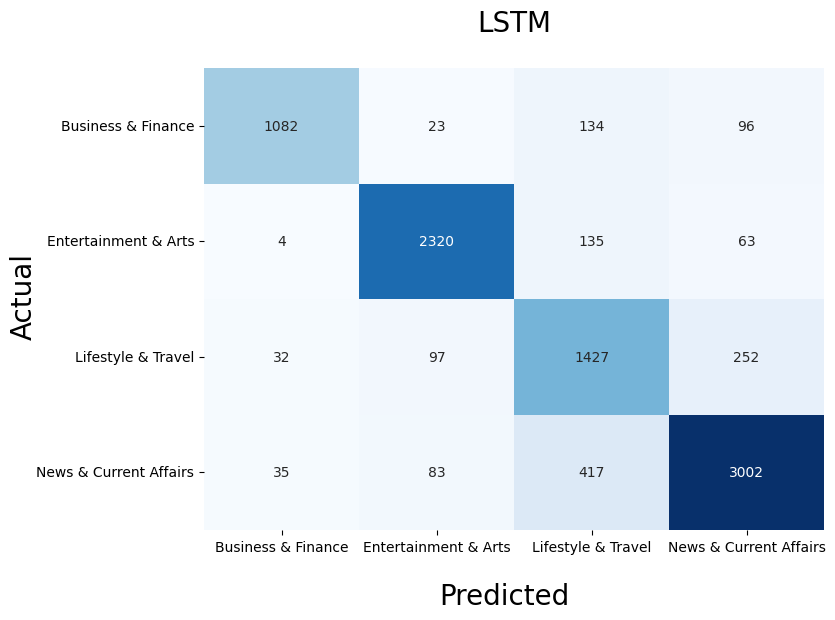

In [195]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

ax1 = plt.subplot(1, 1, 1)

sns.heatmap(dataframe, cmap="Blues", annot = True, fmt="d", cbar =False)
fig.text(0.5, 0.00, 'Predicted', ha='center', va='center', fontsize = 20)
fig.text(-0.1, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize = 20)
ax1.text(0.5, 1.08, 'LSTM',
    horizontalalignment='center',
    fontsize=20,
    transform = ax1.transAxes);

In [196]:
fprs = {}
tprs = {}
thresholds ={}

for i in range(len(encoder.classes_)):    
    fprs[i], tprs[i], thresholds[i] = roc_curve(target, pred_probs_for_all_class[:,i], pos_label=i)

In [197]:
auc_score_ovr = roc_auc_score(target, pred_probs_for_all_class, multi_class='ovr', average = 'weighted')
print("AUC SCORE (Test Set): {}".format(auc_score_ovr))

AUC SCORE (Test Set): 0.953493873862474


In [198]:
one_vs_rest_auc = roc_auc_score(target, pred_probs_for_all_class, multi_class='ovr', average = None)

In [199]:
encoder.classes_

array(['Business & Finance', 'Entertainment & Arts', 'Lifestyle & Travel',
       'News & Current Affairs'], dtype=object)

Text(0.5, 0.91, 'LSTM')

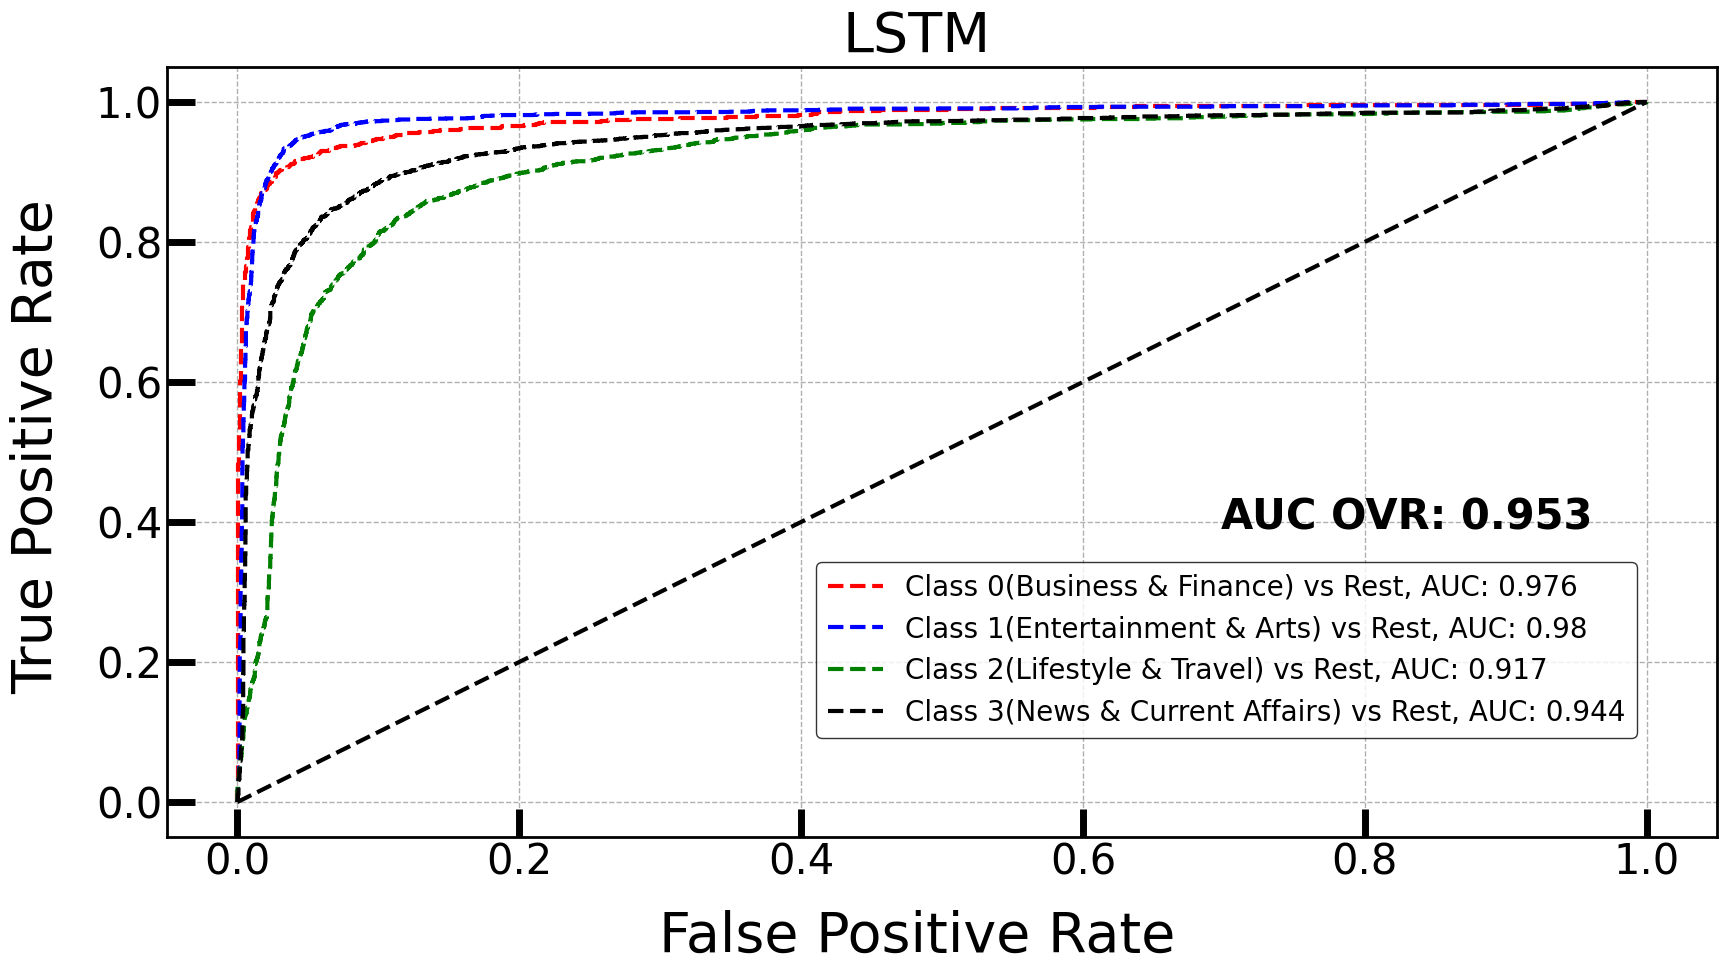

In [202]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

ax1 = plt.subplot(1, 1, 1)

plt.plot(fprs[0], tprs[0], linestyle='--',color='red', label='Class 0(Business & Finance) vs Rest, AUC: '+ \
        str(round(one_vs_rest_auc[0], 3)), linewidth = 3)
plt.plot(fprs[1], tprs[1], linestyle='--',color='blue', label='Class 1(Entertainment & Arts) vs Rest, AUC: '+ \
        str(round(one_vs_rest_auc[1], 3)), linewidth = 3)
plt.plot(fprs[2], tprs[2], linestyle='--',color='green', label='Class 2(Lifestyle & Travel) vs Rest, AUC: '+ \
        str(round(one_vs_rest_auc[2], 3)), linewidth = 3)
plt.plot(fprs[3], tprs[3], linestyle='--',color='black', label='Class 3(News & Current Affairs) vs Rest, AUC: '+ \
        str(round(one_vs_rest_auc[3], 3)), linewidth = 3)


plt.plot([0, 1], [0, 1], color="black", linewidth = 3, linestyle = '--')


ax1.tick_params(axis ='y', labelcolor = 'black',labelsize=30, width=3) 
ax1.tick_params(axis ='x', labelcolor = 'black',labelsize=30, width=3) 



ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)



ax1.tick_params(which='both', width=5)
ax1.tick_params(which='major', length=20)
ax1.tick_params(which='minor', length=5)
ax1.tick_params(which = 'both', direction = 'in')


ax1.grid(True, which = 'major', alpha = 1, linestyle='--', linewidth = 1)
lines_labels = [[ax.get_legend_handles_labels() for ax in fig.axes][0]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
leg = ax1.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.41, 0.375), fontsize = 20, ncol = 1,markerscale = 10)
leg.get_frame().set_edgecolor('black')


ax1.text(0.8, 0.4, 'AUC OVR: '+ str(round(auc_score_ovr, 3)),
    horizontalalignment='center',
    fontsize=30,fontweight = 'bold',
    transform = ax1.transAxes);


plt.subplots_adjust(wspace=0.2,hspace=0.3)
fig.text(0.5, 0.01, 'False Positive Rate', ha='center', va='center', fontsize = 40)
fig.text(0.06, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical', fontsize = 40, color = 'black')
fig.text(0.5, 0.91, 'LSTM', ha='center', va='center', fontsize = 40)

# Conclusion

<b><font color='red'>The LSTM model performed much better than the unstable vanilla RNN. However, the model started to overfit on the training data due to which, the early stopping stopped the model training after 5 continuous epoch of validation loss diverging from the training loss.i.e valdiation loss not improving.


The model achieved a test accuracy of 85%. This data was, however, recategorized into 4 new subcategories. I did this because I was originally training my data with a Vanilla RNN which is already very unstable and I felt that it would surely underfit. I will create a new notebook with the original 18 subcategories and see if the LSTM model performs well. If it does perform reasonably well, I will use that model and deploy into a web app using fastapi. Otherwise, I will use this model respectively. </font>

# Thank you

### - by Sujan Neupane